In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
train = pd.read_csv('~/Dropbox/DSI/train.csv')
cols = [i for i in train.columns]
train.Date = pd.to_datetime(train.Date)

In [17]:
def eda(dataframe):
    print "Dataframe Shape", dataframe.shape
    print ""
    table = pd.DataFrame({"Missing": dataframe.isnull().sum(),
                          "Types": dataframe.dtypes,
                         "Uniques": [dataframe[i].nunique() for i in dataframe]})
    print table
    print ""
    print "Describe Dataframe"
    print dataframe.describe()

In [18]:
train.columns[train.isnull().sum()>0]

Index([u'WetBulb', u'PrecipTotal', u'StnPressure', u'PrecipTotal_date-1',
       u'SeaLevel_date-1', u'Tavg_date-2', u'SeaLevel_date-2',
       u'AvgSpeed_date-2', u'Tavg_date-3', u'WetBulb_date-3',
       u'PrecipTotal_date-3', u'StnPressure_date-3', u'SeaLevel_date-3',
       u'WetBulb_date-4', u'PrecipTotal_date-4', u'SeaLevel_date-4',
       u'WetBulb_date-5', u'StnPressure_date-5'],
      dtype='object')

In [19]:
train.loc[train['Tavg_date-2'].isnull()==True,'Tavg'].mean()

65.0

In [20]:
train.loc[train.Tavg==65.0,'Tavg_date-2'].mean()

68.05882352941177

In [21]:
for i in train.columns[train.isnull().sum()>0]: # for all the columns with nans
    mean_avg_temp = train.loc[train[i].isnull()==True,'Tavg'].mean() # what is the mean Tavg
    mean_i_val = train.loc[train.Tavg==mean_avg_temp,i].mean() # what is i val for that Tavg
    train.loc[train[i].isnull()==True,'to_fill'] = mean_i_val
    train[i] = train[i].fillna(train.to_fill)
    train.drop('to_fill',axis=1,inplace=True)

In [22]:
has_nulls = train.loc[train.isnull().any(axis=1),train.columns[train.isnull().sum()>0]]

In [23]:
dates = ['_date-'+str(i) for i in range(1,7)]
for i,v in enumerate(cols):
    try:
        if v in dates: # drops out the repeated date column
            train.drop(v,axis=1,inplace=True)
    except:
        pass
    try:
        if 'Date_date-' in v:
            train.drop(v,axis=1,inplace=True)
    except:
        pass

In [35]:
train['Trap_Mosquitos_today'] = train.groupby(['Trap','Date'])['NumMosquitos'].transform('sum')
train['Trap_Species_today'] = train.groupby(['Trap','Date','Species'])['NumMosquitos'].transform('sum')
train['min_Wnv_species_today'] = train.groupby(['Trap','Date','Species'])['WnvPresent'].transform('sum')

In [40]:
train[train.WnvPresent == 1][['Date','Trap','Species','NumMosquitos','Trap_Mosquitos_today',
       'Trap_Species_today','WnvPresent','min_Wnv_species_today']].head(50)

,Date,Trap,Species,NumMosquitos,Trap_Mosquitos_today,Trap_Species_today,WnvPresent,min_Wnv_species_today
553,2007-07-18,T215,CULEX PIPIENS/RESTUANS,50,85,63,1,1
603,2007-07-25,T115,CULEX PIPIENS/RESTUANS,50,3002,644,1,2
611,2007-07-25,T115,CULEX PIPIENS/RESTUANS,50,3002,644,1,2
618,2007-07-25,T115,CULEX PIPIENS,50,3002,2356,1,3
660,2007-07-25,T115,CULEX PIPIENS,50,3002,2356,1,3
661,2007-07-25,T115,CULEX PIPIENS,50,3002,2356,1,3
777,2007-08-01,T002,CULEX PIPIENS/RESTUANS,50,179,104,1,2
778,2007-08-01,T002,CULEX PIPIENS/RESTUANS,21,179,104,1,2
784,2007-08-01,T015,CULEX PIPIENS/RESTUANS,5,18,11,1,1
845,2007-08-01,T220,CULEX PIPIENS/RESTUANS,2,2,2,1,1


In [43]:
train.loc[550:700,['Date','Trap','Species','NumMosquitos','Trap_Mosquitos_today',
       'Trap_Species_today','WnvPresent','min_Wnv_species_today']]

,Date,Trap,Species,NumMosquitos,Trap_Mosquitos_today,Trap_Species_today,WnvPresent,min_Wnv_species_today
550,2007-07-18,T212,CULEX RESTUANS,12,140,12,0,0
551,2007-07-18,T212,CULEX PIPIENS,26,140,26,0,0
552,2007-07-18,T215,CULEX PIPIENS/RESTUANS,13,85,63,0,1
553,2007-07-18,T215,CULEX PIPIENS/RESTUANS,50,85,63,1,1
554,2007-07-18,T215,CULEX RESTUANS,1,85,1,0,0
555,2007-07-18,T215,CULEX PIPIENS,21,85,21,0,0
556,2007-07-19,T091,CULEX PIPIENS,2,2,2,0,0
557,2007-07-19,T145,CULEX PIPIENS/RESTUANS,1,1,1,0,0
558,2007-07-19,T047,CULEX RESTUANS,1,1,1,0,0
559,2007-07-19,T035,CULEX PIPIENS/RESTUANS,3,3,3,0,0


In [24]:
# need to label encode Species and Trap
from sklearn.preprocessing import LabelEncoder,normalize,StandardScaler
le = LabelEncoder()
le.fit(train.Species)
train['mosquito'] = le.transform(train.Species)
le.fit(train.Trap)
train['trap_e'] = le.transform(train.Trap)
cols = [i for i in train.columns]
X_cols = cols[13:]
X_cols.append('Latitude')
X_cols.append('Longitude')
X_cols.append('AddressAccuracy')
X_cols.append('NumMosquitos')
y = train.dropna()['WnvPresent']

In [25]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,SH_date-6,RA_date-6,\+FC_date-6,SA_date-6,SG_date-6,PO_date-6,PL_date-6,SN_date-6,mosquito,trap_e
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0,0,0,0,0,0,0,2,1
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0,0,0,0,0,0,0,0,3,1
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,0,0,0,0,0,0,0,0,3,6


In [26]:
for i in X_cols:
    print i

Weather_Station
T152_dist
T153_dist
T019_dist
T018_dist
T156_dist
T157_dist
T154_dist
T155_dist
T013_dist
T012_dist
T011_dist
T159_dist
T017_dist
T016_dist
T015_dist
T014_dist
T151_dist
T080_dist
T081_dist
T082_dist
T083_dist
T084_dist
T085_dist
T086_dist
T088_dist
T089_dist
T158_dist
T149_dist
T148_dist
T009Alt_dist
T145_dist
T144_dist
T147_dist
T146_dist
T141_dist
T143_dist
T142_dist
T903_dist
T092_dist
T091_dist
T090_dist
T097_dist
T096_dist
T095_dist
T094_dist
T099_dist
T222_dist
T138_dist
T046_dist
T128_dist
T114_dist
T027_dist
T025_dist
T228_dist
T229_dist
T900_dist
T224_dist
T225_dist
T226_dist
T227_dist
T220_dist
T221_dist
T028_dist
T223_dist
T044_dist
T045_dist
T129_dist
T047_dist
T040_dist
T043_dist
T048_dist
T049_dist
T031_dist
T030_dist
T033_dist
T035_dist
T034_dist
T037_dist
T036_dist
T039_dist
T236_dist
T235_dist
T233_dist
T232_dist
T231_dist
T230_dist
T054_dist
T051_dist
T050_dist
T209_dist
T200_dist
T206_dist
T062_dist
T063_dist
T060_dist
T061_dist
T066_dist
T067_dist
T

In [16]:
# Standardize values
X_values = train[X_cols].dropna().values # convert to numpy array
ss = StandardScaler()
X_std = ss.fit_transform(X_values)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
X = X_std
y = train.dropna()['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.33)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
def evaluate_model(m):
    model = m.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test,y_pred,labels =[0,1])
    class_report = classification_report
    print m,'\n'
    print "Accuracy Score:\t{:0.3}".format(score.round(3)),'\n\n'
    crossval = cross_val_score(m, X, y,cv=7)
    print "Cross Val Scores:", crossval,'\n'
    print "Cross Val mean ± Std. Dev:{:0.3}".format(np.mean(crossval), '±',np.std(crossval)),'\n'
    print "Predicted Totals:"
    for i,v in enumerate(np.bincount(y)):
        print "class "+str(i)+':' , v
    print "\nConfusion Matrix:"
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
    confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 0'],
                         columns=['Predicted 1','Predicted 0'])
    print(confusion),'\n'
    print "Classification Report:"
    print(classification_report(y_test, y_pred, target_names=['0','1']))
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.94766577460600654

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 

Accuracy Score:	0.948 


Cross Val Scores: [ 0.87234043  0.17089911  0.78419244  0.7814433   0.62817869  0.53883162
  0.43436426] 

Avg cross val: 0.601464263224 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           15          159
Actual 0           17         3172 

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      3189
          1       0.47      0.09      0.15       174

avg / total       0.93      0.95      0.93      3363



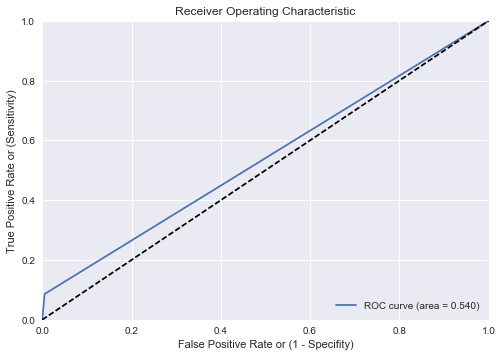

In [19]:
evaluate_model(lr)

In [20]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
print fpr, tpr, thresholds

[ 0.          0.00533082  1.        ] [ 0.         0.0862069  1.       ] [2 1 0]


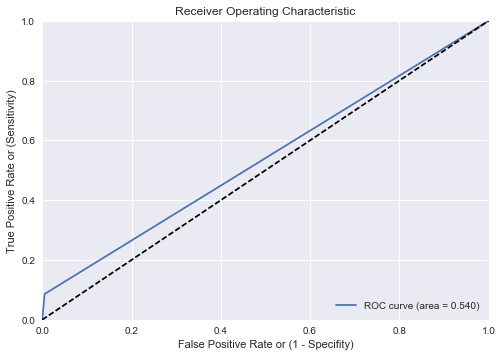

In [21]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specificity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 

Accuracy Score:	0.941 


Cross Val Scores: [ 0.94783802  0.25394647  0.79725086  0.94845361  0.76838488  0.76907216
  0.43642612] 

Avg cross val: 0.703053159649 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           36          138
Actual 0           59         3130 

Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      3189
          1       0.38      0.21      0.27       174

avg / total       0.93      0.94      0.93      3363



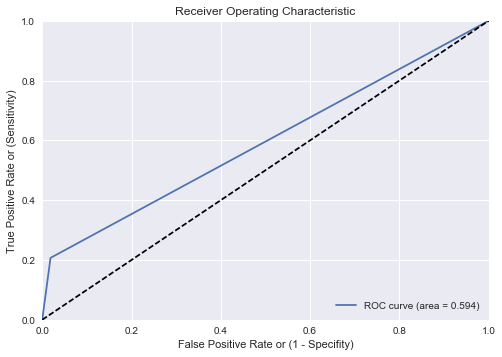

In [23]:
clf = RandomForestClassifier()
evaluate_model(clf)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30,svd_solver='full')
pca.fit(X)
X_pca = pca.transform(X)
print pca.explained_variance_ratio_
X_train, X_test, y_train, y_test = train_test_split(X_pca, y,stratify=y, test_size=0.33)

[ 0.33207339  0.14743757  0.05621344  0.05260143  0.02602569  0.02423354
  0.02188525  0.01764656  0.01626671  0.01314682  0.01226457  0.01109881
  0.00944207  0.00914655  0.00842117  0.00795456  0.00783454  0.00756954
  0.00728823  0.00686499  0.00656028  0.00618182  0.00614145  0.00567709
  0.00543042  0.00524209  0.00492154  0.00476898  0.00470944  0.00449819]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None) 

Accuracy Score:	0.949 


Cross Val Scores: [ 0.92381606  0.35827042  0.93127148  0.94845361  0.83573883  0.77525773
  0.39793814] 

Avg cross val: 0.738678038983 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1            2          172
Actual 0            0         3189 

Classification Report:
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      3189
          1       1.00      0.01      0.02       174

avg / total       0.95      0.95      0.92      3363



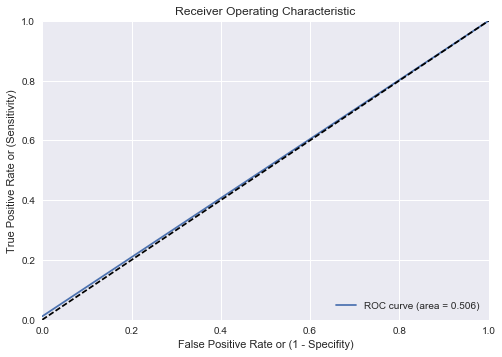

In [25]:
clf = AdaBoostClassifier()
evaluate_model(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 

Accuracy Score:	0.938 


Cross Val Scores: [ 0.94783802  0.23610158  0.80274914  0.94845361  0.81580756  0.75738832
  0.3766323 ] 

Avg cross val: 0.697852932822 

Predicted Totals:
class 0: 9662
class 1: 527

Confusion Matrix:
          Predicted 1  Predicted 0
Actual 1           25          149
Actual 0           61         3128 

Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97      3189
          1       0.29      0.14      0.19       174

avg / total       0.92      0.94      0.93      3363



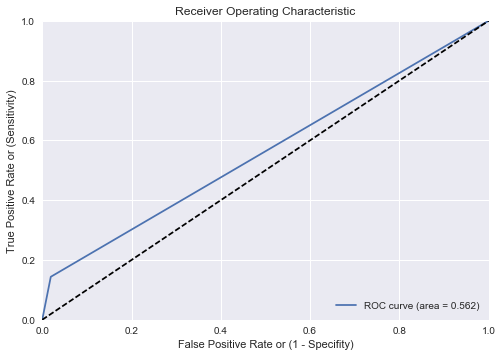

In [26]:
# Running after applying PCA
clf = RandomForestClassifier()
evaluate_model(clf)

In [21]:
from sklearn import svm

In [ ]:
clf = svm.SVC(kernel='linear',C=10)
evaluate_model(clf)

In [ ]:
from sklearn.grid_search import GridSearchCV
clf = svm.SVC()
gamma_range = 10.**np.arange(-3, 5)
C_range = 10.**np.arange(-2, 9)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernel_range)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
import matplotlib.pyplot as plt
%matplotlib inline
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.plot(grid_mean_scores)
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

/Users/austinbrian/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/austinbrian/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
print 3